In [2]:
def resolver_probabilidad():
    p_A_union_noB = 0.8  # P(A U B')
    p_no_A = 0.5         # P(A')
    p_A_y_B = 0.2        # P(A n B) Intersección

    print(f"--- Datos Iniciales ---")
    print(f"P(A U B'): {p_A_union_noB}")
    print(f"P(A'): {p_no_A}")
    print(f"P(A n B): {p_A_y_B}")
    print("-" * 20)

    # --- PASO 1: Hallar P(A) ---
    # Si P(No A) es 0.5, P(A) es el resto
    p_A = 1 - p_no_A
    print(f"1. P(A) calculado: {p_A}")

    # --- PASO 2: Hallar P(Solo B) ---
    # Sabemos que P(A U B') cubre todo MENOS la parte exclusiva de B.
    # Por tanto, P(Solo B) es lo que falta para llegar a 1.
    p_solo_B = 1 - p_A_union_noB
    print(f"2. P(Solo B) deducido: {round(p_solo_B, 2)}")

    # --- PASO 3: Hallar P(B) Total ---
    # P(B) es la suma de su parte exclusiva + la parte que comparte con A
    p_B_total = p_solo_B + p_A_y_B
    
    print("-" * 20)
    print(f" RESULTADO FINAL P(B): {round(p_B_total, 2)}")

# Ejecutamos
resolver_probabilidad()

--- Datos Iniciales ---
P(A U B'): 0.8
P(A'): 0.5
P(A n B): 0.2
--------------------
1. P(A) calculado: 0.5
2. P(Solo B) deducido: 0.2
--------------------
 RESULTADO FINAL P(B): 0.4


In [4]:
# Definimos eventos como conjuntos
A = {1, 2, 3, 5}
B = {3, 4, 5, 6}

# 1. Intersección (AND) -> A ∩ B
# Elementos comunes
print(f"A & B : {A & B}")  
# Output: {3, 5}

# 2. Unión (OR) -> A U B
# Todos los elementos sin repetir
print(f"A | B : {A | B}")  
# Output: {1, 2, 3, 4, 5, 6}

# 3. Diferencia -> A - B
# Están en A pero NO en B
print(f"A - B : {A - B}")  
# Output: {1, 2}

# 4. Diferencia Simétrica (XOR) -> A Δ B
# Están en A o en B, pero NO en ambos (Lo contrario a la intersección)
print(f"A ^ B : {A ^ B}")  
# Output: {1, 2, 4, 6}

A & B : {3, 5}
A | B : {1, 2, 3, 4, 5, 6}
A - B : {1, 2}
A ^ B : {1, 2, 4, 6}


In [5]:
def teorema_bayes(prior, tasa_verdadero_positivo, tasa_falso_positivo):
    prior_negativo = 1 - prior
    
    evidencia_total = (tasa_verdadero_positivo * prior) + (tasa_falso_positivo * prior_negativo)
    
    posterior = (tasa_verdadero_positivo * prior) / evidencia_total
    
    return posterior

prob_virus = 0.01
precision_antivirus = 0.99
falsa_alarma = 0.05

probabilidad_real = teorema_bayes(prob_virus, precision_antivirus, falsa_alarma)

print(f"Probabilidad Inicial (Prior): {prob_virus}")
print(f"Probabilidad Final (Posterior): {round(probabilidad_real, 4)}")

Probabilidad Inicial (Prior): 0.01
Probabilidad Final (Posterior): 0.1667


#usaremos Matplotlib para graficar
# ---------------------------------------------------------
# 📊 VISUALIZACIÓN 1: LEY DE LOS GRANDES NÚMEROS (CONVERGENCIA)
# ---------------------------------------------------------
# CONCEPTO:
# Muestra la batalla entre la "Teoría" y la "Realidad".
#
# INTERPRETACIÓN GRÁFICA:
# - Línea Roja (Target): Es la probabilidad matemática perfecta (0.5).
# - Línea Azul (Realidad): Son los resultados acumulados de tus lanzamientos.
#
# CONCLUSIÓN PARA IA:
# Al principio (pocos datos), la línea azul oscila violentamente (ruido/suerte).
# Al final (muchos datos), se "imanta" a la línea roja.
# Por eso los modelos de IA necesitan Big Data para ser fiables.

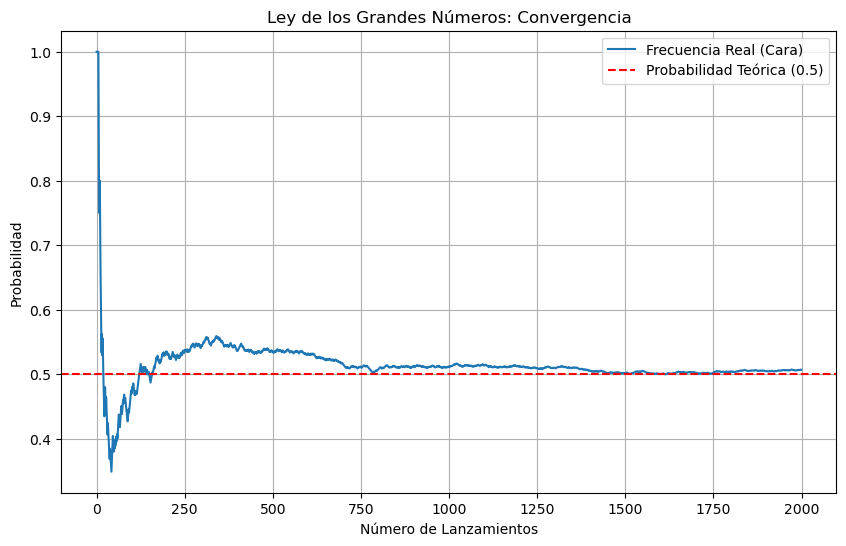

In [ ]:

# ---------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

lanzamientos = 2000
resultados = np.random.randint(0, 2, lanzamientos)
promedio_acumulado = np.cumsum(resultados) / (np.arange(lanzamientos) + 1)

plt.figure(figsize=(10, 6))
plt.plot(promedio_acumulado, label='Frecuencia Real (Cara)')
plt.axhline(0.5, color='r', linestyle='--', label='Probabilidad Teórica (0.5)')
plt.title('Ley de los Grandes Números: Convergencia')
plt.xlabel('Número de Lanzamientos')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 🔔 VISUALIZACIÓN 2: DISTRIBUCIÓN NORMAL (DETECCIÓN DE ANOMALÍAS)
# ---------------------------------------------------------
# CONCEPTO:
# Representa cómo se comportan los datos naturales (o de red).
# La mayoría se agrupa en el centro; lo raro se va a los bordes.
#
# INTERPRETACIÓN GRÁFICA:
# - Curva Verde (Histograma): Tus datos reales.
# - Línea Negra (Campana): La forma matemática ideal.
# - Líneas Rojas (Límites): Marcan 2 Desviaciones Estándar (Sigma).
#
# CONCLUSIÓN PARA CIBERSEGURIDAD:
# Todo lo que queda DENTRO de las líneas rojas es tráfico "Normal".
# Todo lo que queda FUERA (en las colas planas) es un "Outlier".
# Outlier = Comportamiento anómalo = Posible Ataque o Fallo.
# ---------------------------------------------------------

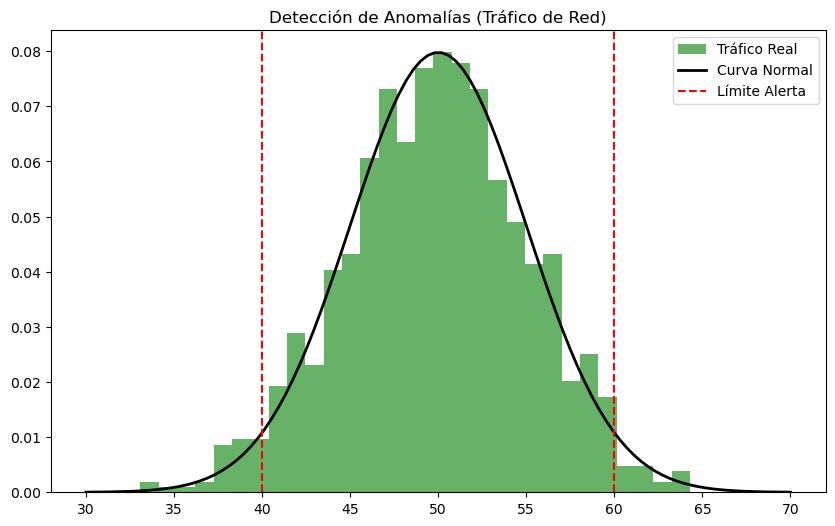

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

mu = 50 
sigma = 5 
datos = np.random.normal(mu, sigma, 1000)

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.hist(datos, bins=30, density=True, alpha=0.6, color='g', label='Tráfico Real')
plt.plot(x, pdf, 'k', linewidth=2, label='Curva Normal')

plt.axvline(mu - 2*sigma, color='r', linestyle='--', label='Límite Alerta')
plt.axvline(mu + 2*sigma, color='r', linestyle='--')

plt.title('Detección de Anomalías (Tráfico de Red)')
plt.legend()
plt.show()

# ---------------------------------------------------------
# 🧠 VISUALIZACIÓN 3: TEOREMA DE BAYES (PRIOR VS POSTERIOR)
# ---------------------------------------------------------
# CONCEPTO:
# Muestra cómo actualizamos una probabilidad base (Prior)
# después de recibir una evidencia nueva (Test/Alerta).
#
# INTERPRETACIÓN GRÁFICA:
# - Barra Izquierda (Prior): Lo que creíamos ANTES del test (ej: 1% Virus).
# - Barra Derecha (Posterior): Lo que creemos DESPUÉS del positivo.
#
# CONCLUSIÓN ESTRATÉGICA:
# Observa que la barra naranja (Posterior) sube, pero no llega al 100%.
# Esto visualiza por qué existen los "Falsos Positivos":
# Aunque la alerta sonó, la probabilidad real sigue siendo baja (16%)
# porque el evento base era muy raro.
# ---------------------------------------------------------

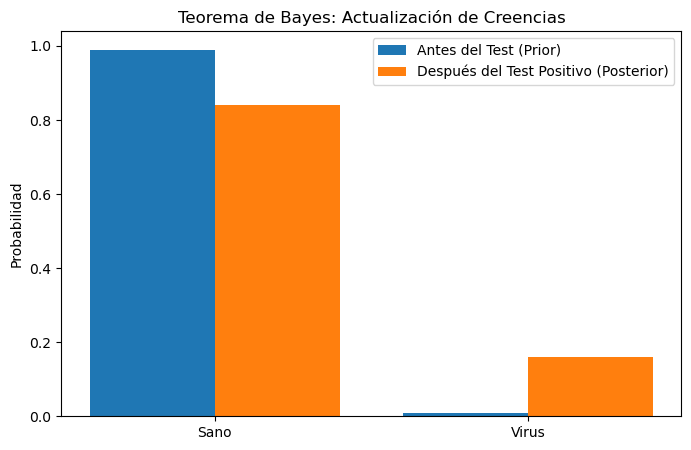

In [8]:
import matplotlib.pyplot as plt

labels = ['Sano', 'Virus']
prior = [0.99, 0.01]    
posterior = [0.84, 0.16] 

x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, prior, width=0.4, label='Antes del Test (Prior)', align='center')
plt.bar([i + 0.4 for i in x], posterior, width=0.4, label='Después del Test Positivo (Posterior)', align='center')

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel('Probabilidad')
plt.title('Teorema de Bayes: Actualización de Creencias')
plt.legend()
plt.show()

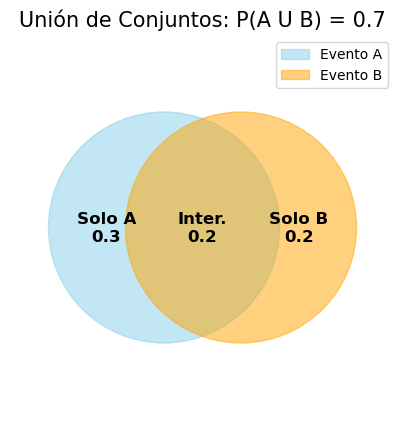

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ---------------------------------------------------------
# 🎨 VENN ARTESANAL (SOLO MATPLOTLIB)
# ---------------------------------------------------------
# Como no tenemos 'matplotlib-venn', dibujamos círculos
# usando la librería estándar.
# ---------------------------------------------------------

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 5))

# 1. Definimos los dos Círculos
# Circle((x, y), radio, ...)
circulo_A = patches.Circle((0.4, 0.5), 0.3, alpha=0.5, color='skyblue', label='Evento A')
circulo_B = patches.Circle((0.6, 0.5), 0.3, alpha=0.5, color='orange', label='Evento B')

# 2. Los añadimos al gráfico
ax.add_patch(circulo_A)
ax.add_patch(circulo_B)

# 3. Ponemos los NÚMEROS (Lo importante)
# Coordenada izquierda (Solo A)
plt.text(0.25, 0.5, 'Solo A\n0.3', ha='center', va='center', fontsize=12, fontweight='bold')

# Coordenada derecha (Solo B)
plt.text(0.75, 0.5, 'Solo B\n0.2', ha='center', va='center', fontsize=12, fontweight='bold')

# Coordenada central (Intersección)
plt.text(0.5, 0.5, 'Inter.\n0.2', ha='center', va='center', fontsize=12, fontweight='bold')

# 4. Ajustes estéticos para que se vea limpio
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal') # Para que los círculos no parezcan huevos
plt.axis('off')        # Quitar los ejes y números de borde
plt.title(f'Unión de Conjuntos: P(A U B) = 0.7', fontsize=15)

# Leyenda manual
plt.legend(handles=[circulo_A, circulo_B], loc='upper right')

plt.show()